In [64]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

mcmc = pickle.load(open('../model/mem_result_with_s2_v_d_120_simul.pkl','rb'))
# params={'beta0':-1, 'beta1':1, 'mu_x':0.5, 's2_x':1/36, 's2_ep':0.35, 's2_v':1/36, 's2_d':1/100}
params={'beta0':-1, 'beta1':1, 'mu_x':0.5, 's2_x':1, 's2_ep':1, 's2_v':1, 's2_d':1}

heights = {'beta0':2, 'beta1':2, 'mu_x':4, 's2_x':2, 's2_ep':2, 's2_v':3, 's2_d':3}
# heights={'beta0':8, 'beta1':10, 'mu_x':10, 's2_x':3, 's2_ep':1, 's2_v':3, 's2_d':3}

beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']
mu_x = mcmc.act_params['mu_x']
s2_x = mcmc.act_params['s2_x']
s2_ep = mcmc.act_params['s2_ep']
s2_v = mcmc.act_params['s2_v']
s2_d = mcmc.act_params['s2_d']
y = mcmc.act_params['y']
x = mcmc.act_params['x']
w = mcmc.act_params['w']
z = mcmc.act_params['z']


# beta0 = -1; beta1 = 1
# s2_v = 1/36; s2_d = 1/30; s2_x = 1/36; s2_ep = 0.35

n = 120
np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
# np.random.seed(1)
d = np.random.normal(0, np.sqrt(s2_d), n)
# np.random.seed(1)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
# np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
# w = x+v
# z = x+d
y = beta0 + beta1*x + ep

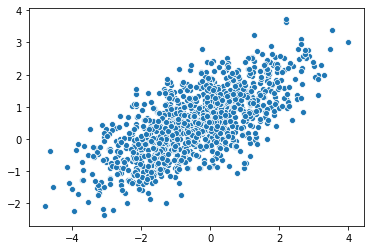

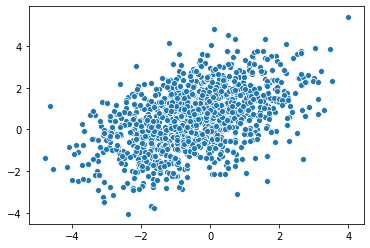

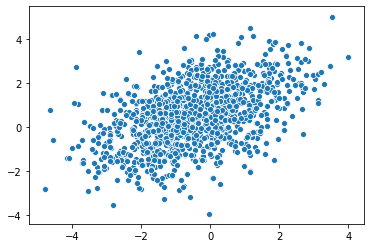

In [58]:
sns.scatterplot(y,x)
plt.show()
sns.scatterplot(y,z)
plt.show()
sns.scatterplot(y,w)
plt.show()

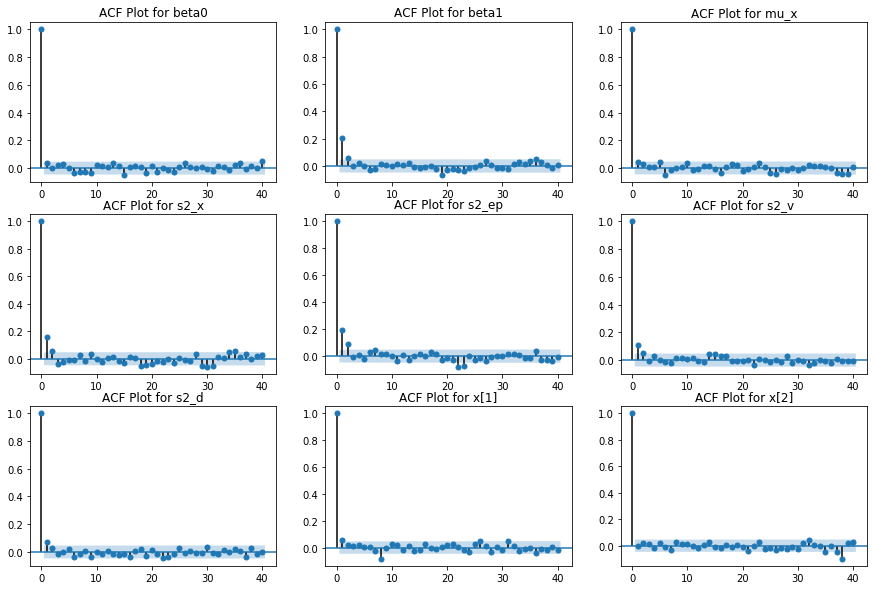

In [59]:
burnin = 1000
thinning = 5

fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        
        if (i == 2 and j == 1) or (i == 2 and j == 2):
            key = 'x'
            plot_acf(mcmc.params[key][j,:][burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}')
            
        a += 1
plt.savefig('autocorr.png')
plt.show()

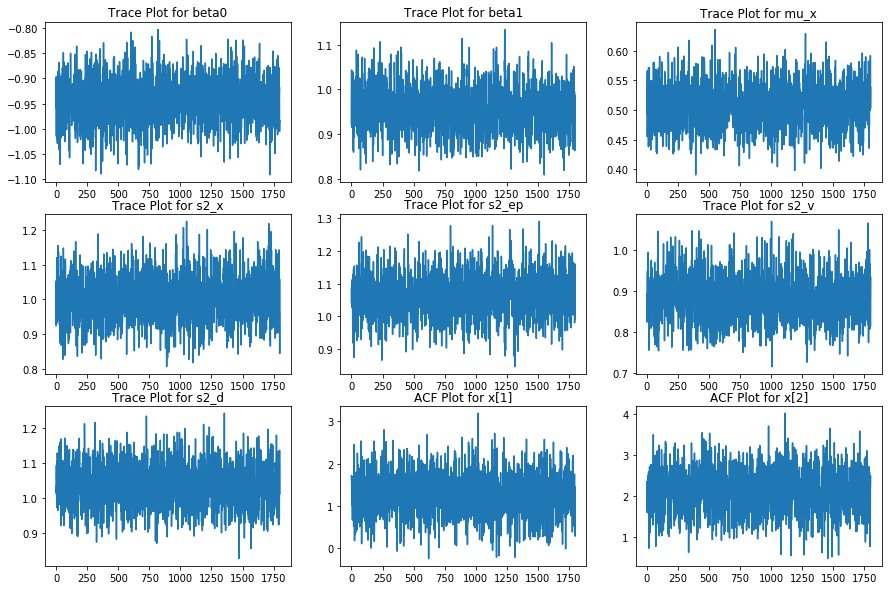

In [60]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        if (i == 2 and j == 1) or (i == 2 and j == 2):
            key = 'x'
            ax[i][j].plot(mcmc.params[key][j,:][burnin::thinning])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            ax[i][j].plot(mcmc.params[key][burnin::thinning])
            ax[i][j].set_title(f'Trace Plot for {key}')
        a += 1
plt.savefig('traceplot.png')
plt.show()

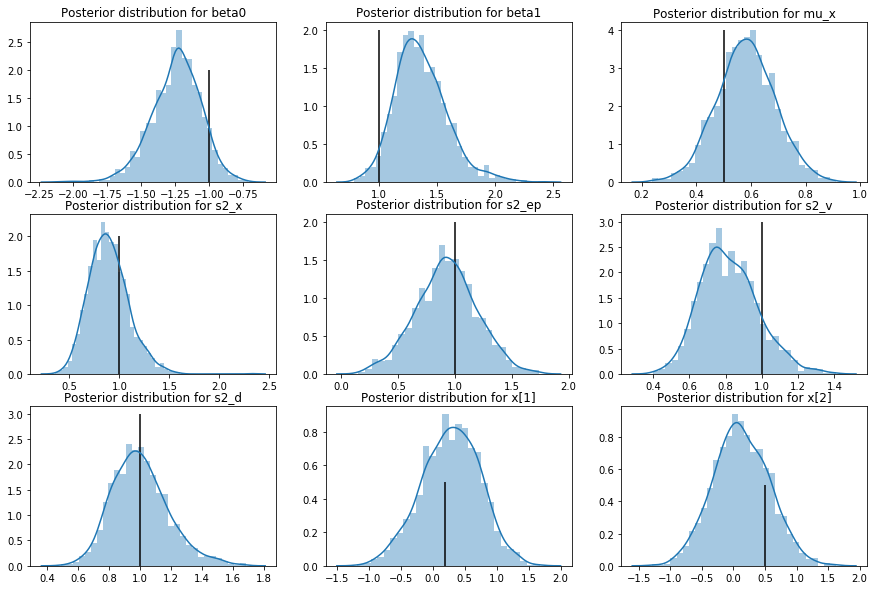

In [65]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
a = 0
for i in range(3):
    for j in range(3):
        if (i == 2 and j == 1) or (i == 2 and j == 2):
            key = 'x'
            sns.distplot(mcmc.params[key][j,:][burnin::thinning], ax=ax[i][j], norm_hist=True)
            ax[i][j].vlines(x[j] ,0, 0.5)
            ax[i][j].set_title(f'Posterior distribution for {key}[{j}]')
            
        else:
            key = list(mcmc.params.keys())[a]
            sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i][j], norm_hist=True)
            ax[i][j].vlines(params[key] ,0, heights[key])
            ax[i][j].set_title(f'Posterior distribution for {key}')
            
        a += 1
plt.savefig('/Users/shinbo/Desktop/metting/LDA/meeting materials/20.11.19/density_mem_120.png')
plt.show()

In [63]:
print(f'beta0: {np.median(mcmc.params["beta0"])}')
print(f'beta1: {np.median(mcmc.params["beta1"])}')
print(f's2_ep: {np.median(mcmc.params["mu_x"])}')
print(f's2_ep: {np.median(mcmc.params["s2_x"])}')
print(f's2_ep: {np.median(mcmc.params["s2_ep"])}')
print(f's2_ep: {np.median(mcmc.params["s2_v"])}')
print(f's2_ep: {np.median(mcmc.params["s2_d"])}')

beta0: -0.941691539605255
beta1: 0.9548620609015186
s2_ep: 0.5093017510204748
s2_ep: 1.002521195194518
s2_ep: 1.0599884081089366
s2_ep: 0.8824984330990883
s2_ep: 1.0344092636443334


In [51]:
mcmc.params['x'].shape

(120, 10001)

In [16]:
x

array([ 1.0154138 , -0.61487105, -0.26730983,  1.17457071,  1.96089238,
        1.0924728 ,  1.69783084,  2.20459417,  1.54008915, -0.41844004,
        0.39465529,  1.13019567,  0.0851531 ,  0.95194604, -1.07915629,
       -0.32862798,  1.02887975, -1.73708651, -0.6077125 ,  0.48228168,
       -1.21939447,  0.557121  , -0.29954749,  0.2084054 ,  0.24101715,
        0.6892932 , -0.06378873,  0.58968641, -0.1011568 ,  1.05607351,
        2.19380911,  0.69686978,  0.66986926, -0.66400797,  1.19336623,
       -0.25806733, -0.3088472 ,  1.05743945,  0.68103874,  1.60717545,
        1.94287693, -0.03968156,  0.62837699,  2.26041518,  1.46653925,
        1.21304905,  1.80620607, -0.10460297,  1.13658341,  1.90925339,
        2.12091229, -0.30618482,  0.24832579,  0.88271517,  0.21100266,
        0.10818376,  1.18400133,  0.14659002, -1.28791289,  0.86184732,
        0.07550721, -0.23153098, -1.06573815,  1.51382247, -1.72711263,
       -1.1993336 ,  0.22415394,  1.72895559,  1.80970591, -0.65

In [143]:
1/36

0.027777777777777776

In [132]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

In [133]:
print('====================== 95% credible interval for each parameter ======================')
params_name = mcmc.params.keys()
for n in params_name:
    
    if n == 'x':
        for i in range(3):
            lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
            print(f'{n}[{i}]:  {lower},  {upper}')
    else:
        lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
        print(f'{n}:  {lower},  {upper}')

====================== 95% credible interval for each parameter ======================
beta0:  -2.221,  -1.073
beta1:  1.202,  3.389
mu_x:  0.479,  0.55
s2_x:  0.015,  0.037
s2_ep:  0.257,  0.48
s2_v:  0.015,  0.035
s2_d:  0.022,  0.045
x[0]:  0.352,  0.699
x[1]:  0.251,  0.602
x[2]:  0.301,  0.655


In [15]:
np.random.seed(1)
n = 1000
v = np.random.normal(0, np.sqrt(s2_v), n)
# np.random.seed(1)
d = np.random.normal(0, np.sqrt(s2_d), n)
# np.random.seed(1)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)

In [18]:
np.correlate(v,d)

array([146.39057811])

In [168]:
np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
# w = np.random.normal(mu_x, np.sqrt(s2_x + s2_v), n)
# np.random.seed(1)
d = np.random.normal(0, np.sqrt(s2_d), n)
# z = np.random.normal(mu_x, np.sqrt(s2_x + s2_d), n)
# np.random.seed(1)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
# w = np.random.normal(x, np.sqrt(s2_v), n)
# z = np.random.normal(x, np.sqrt(s2_d), n)
# np.random.seed(1)
ep = np.random.normal(0, np.sqrt(s2_ep), n)
# observed
w = x+v
z = x+d
y = beta0 + beta1*x + ep

In [173]:
beta0 + x + ep

array([-0.91285392,  0.00378889, -1.65000088, -0.52423159, -0.78343071,
        0.04303219, -0.09218849, -2.22003158,  0.14763742, -0.52577792,
       -0.54456364, -0.81574446, -0.46070619, -0.42142997,  0.64648892,
       -0.34020483,  1.10661838, -0.86711785, -1.46723193, -0.17829117,
        0.02217031, -0.73336074, -1.27785801, -0.82738475, -0.11205346,
       -0.40861771, -0.52115974, -0.56005835, -1.00642814, -0.93755101,
       -1.20462745,  0.80316573, -0.65476678, -0.0699572 , -1.25076946,
       -0.17458196, -1.84832298,  0.25001876, -0.56328726,  0.98195811,
       -1.4032746 , -0.52773086, -0.26683855,  0.38296801, -0.74004052,
       -0.41365951, -1.76474582, -0.96160324, -0.41889874,  0.16672619,
       -0.69777392,  0.70708559,  0.62343358, -0.64932885, -1.9419323 ,
       -1.60118276, -0.89063715,  0.29093561, -0.47567798, -1.64132198,
       -0.29104247,  0.20928464, -0.86009943, -1.09045094,  0.66901572,
       -0.19792764, -0.78124772, -0.40862058, -0.38621129, -0.85

In [178]:
a = np.random.normal(0,1,100) - np.ones(100) * 0.5

In [180]:
np.dot(a,a)

123.09188342955483

In [182]:
sum(np.power(a,2))

123.09188342955487

In [185]:
for k in mcmc.params.keys():
    print(len(mcmc.params[k]))

10001
10001
10001
10001
10001
10001
10001
1000


In [186]:
mcmc.params[k].shape

(1000, 10001)